Scenario Discovery using Prime Induction Method (PRIM) on the experiments with the most most promising policy set

In [188]:
# Import the necessary libraries
from ema_workbench.analysis import prim
from ema_workbench import load_results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results with the experiments of the promising policies, tested in 1000 scenarios

experiments, outcomes = load_results("results/promising_resample_1000.tar.gz")


# Convert outcomes dictionary to a DataFrame
df_outcomes = pd.DataFrame(outcomes)

# Convert experiments dictionary to a DataFrame
df_experiments = pd.DataFrame(experiments)

In [185]:
df_outcomes.head()

,Gelderland Expected Annual Damage,Gelderland Dike Investment Costs,Gelderland Expected Number of Deaths,Overijssel Expected Annual Damage,Overijssel Dike Investment Costs,Overijssel Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.210380e+09,4.213799e+08,1.068840,2.229780e+07,3.035153e+07,0.014419,121200000.0,0.000000
1,5.205094e+07,4.213799e+08,0.027872,2.206506e+06,3.035153e+07,0.001089,121200000.0,0.000000
2,1.410251e+07,4.006938e+08,0.037371,2.722734e+06,3.880493e+07,0.001952,357700000.0,0.000000
3,1.110288e+06,4.006938e+08,0.001522,0.000000e+00,3.880493e+07,0.000000,357700000.0,0.000000
4,1.935370e+08,2.466866e+08,0.044845,3.161714e+07,3.667233e+07,0.002387,121200000.0,12541.445538


In [186]:
df_experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,model
0,46,143.822128,1.0,0.073098,347.516710,1.0,0.900240,179.151582,1.5,0.383093,...,7,7,0,0,0,3,0,0,4,dikesnet
1,87,226.849897,10.0,0.619912,109.449235,10.0,0.490715,223.275248,1.0,0.930731,...,7,7,0,0,0,3,0,0,5,dikesnet
2,46,143.822128,1.0,0.073098,347.516710,1.0,0.900240,179.151582,1.5,0.383093,...,3,1,3,0,0,3,0,0,4,dikesnet
3,87,226.849897,10.0,0.619912,109.449235,10.0,0.490715,223.275248,1.0,0.930731,...,3,1,3,0,0,3,0,0,5,dikesnet
4,46,143.822128,1.0,0.073098,347.516710,1.0,0.900240,179.151582,1.5,0.383093,...,0,2,1,0,0,3,0,0,4,dikesnet


In [ ]:
# Drop the 'policy' column from df_experiments. This column is not needed for the analysis on specific policy levers and uncertainties.
df_experiments = df_experiments.drop(columns=['policy'])

Overijssel Expected Casualties

- For Overijssel, explore both the scenarios where the expected number of deaths is low (good) and high (bad)
- Consequently, exlore if it's possible to distinguish even more desirable scearios: the real 'best' scenario's, e.g. where the expected number of deaths is at its lowest. 

In [187]:
print(df_outcomes['Overijssel Expected Number of Deaths'].quantile(0.75))

0.023423663678647375


In [ ]:
# --- A. Define binary success condition
X_good = df_outcomes["Overijssel Expected Number of Deaths"] < df_outcomes["Overijssel Expected Number of Deaths"].quantile(0.75)

# Define binary fail condition
X_bad = df_outcomes["Overijssel Expected Number of Deaths"] > df_outcomes["Overijssel Expected Number of Deaths"].quantile(0.75)

# Define binary best condition
X_best = df_outcomes['Overijssel Expected Number of Deaths'] < 0.005

0.023423663678647375


In [162]:
# --- B_1. Fit PRIM algorithm for the good condition
prim_alg_X_good = prim.Prim(df_experiments, X_good, threshold=0.8)
box_X_good = prim_alg_X_good.find_box()


<Figure size 600x400 with 0 Axes>

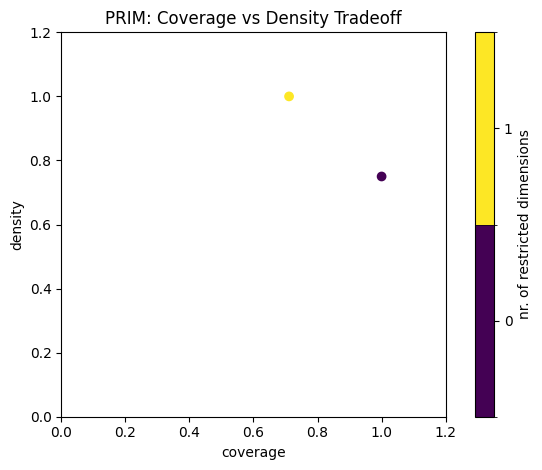

In [163]:
# --- C_1. Plot tradeoff (coverage vs density)
plt.figure(figsize=(6, 4))
box_X_good.show_tradeoff()
plt.title("PRIM: Coverage vs Density Tradeoff")
plt.tight_layout()
plt.show()

In [164]:
# inspect point 

point_X_good = 1
box_X_good.inspect(point_X_good)

coverage     0.711111
density      1.000000
id           1.000000
k           32.000000
mass         0.533333
mean         1.000000
n           32.000000
res_dim      1.000000
Name: 1, dtype: float64

                   box 1                       
                     min  max qp value qp value
A.5_DikeIncrease 0   2.0  7.0   0.0001      NaN



[None]

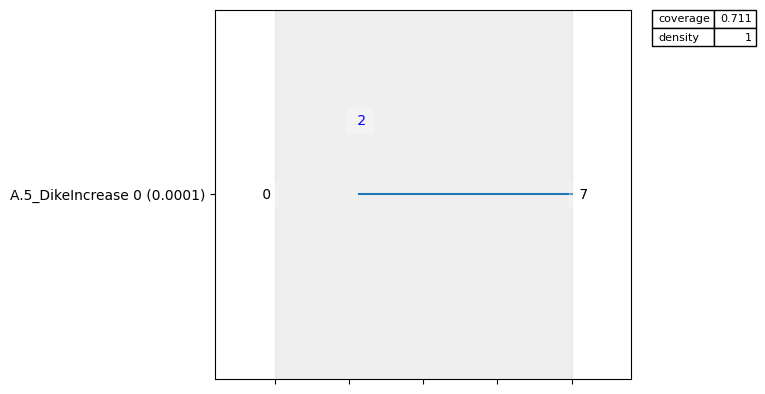

In [165]:
# inspect box limits for the selected point
box_X_good.inspect(point_X_good, style='graph')
plt.show()

In [166]:
# --- B_2. Fit PRIM algorithm for the fail condition
prim_alg_X_bad = prim.Prim(df_experiments, X_bad, threshold=0.8)
box_X_bad = prim_alg_X_bad.find_box()


<Figure size 600x400 with 0 Axes>

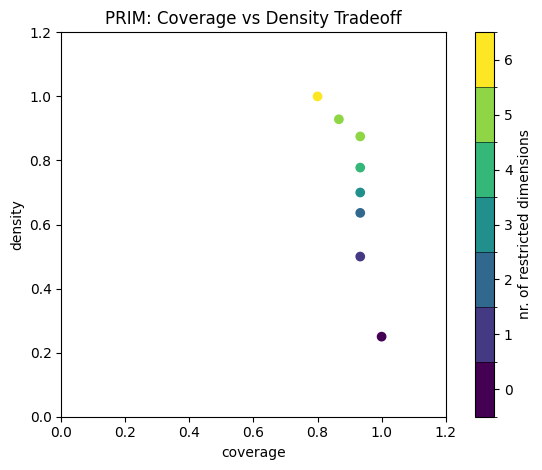

In [167]:
# --- C_2. Plot tradeoff (coverage vs density)
plt.figure(figsize=(6, 4))
box_X_bad.show_tradeoff()
plt.title("PRIM: Coverage vs Density Tradeoff")
plt.tight_layout()
plt.show()

In [168]:
# inspect point 

point_X_bad = 2
box_X_bad.inspect(point_X_bad)

coverage     0.933333
density      0.636364
id           2.000000
k           14.000000
mass         0.366667
mean         0.636364
n           22.000000
res_dim      2.000000
Name: 2, dtype: float64

        box 2                        
          min  max qp value  qp value
3_RfR 2   0.0  0.0      NaN  0.009689
3_RfR 1   0.0  0.0      NaN  0.143139



[None]

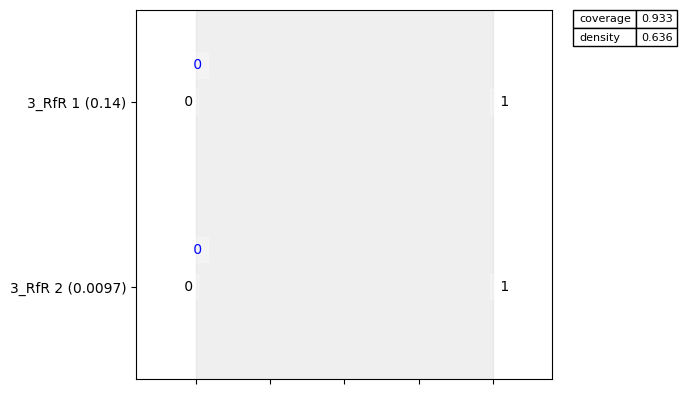

In [169]:
# inspect box limits for the selected point
box_X_bad.inspect(point_X_bad, style='graph')
plt.show()

In [ ]:
# --- B_1. Fit PRIM algorithm for the best condition (e.g., no deaths)
prim_alg_X_best = prim.Prim(experiments, X_best, threshold=0.8)
box_X_best = prim_alg_X_best.find_box()


<Figure size 600x400 with 0 Axes>

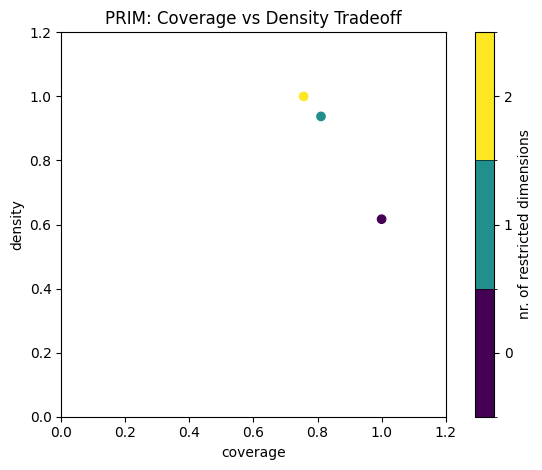

In [129]:
# --- C_2. Plot tradeoff (coverage vs density)
plt.figure(figsize=(6, 4))
box_X_best.show_tradeoff()
plt.title("PRIM: Coverage vs Density Tradeoff")
plt.tight_layout()
plt.show()

In [132]:
# inspect point 

point_X_best = 2
box_X_best.inspect(point_X_best)

coverage     0.756757
density      1.000000
id           2.000000
k           28.000000
mass         0.466667
mean         1.000000
n           28.000000
res_dim      2.000000
Name: 2, dtype: float64

                   box 2                         
                     min   max  qp value qp value
A.5_DikeIncrease 0   2.0   7.0  0.001168      NaN
A.4_DikeIncrease 0   1.0  10.0  0.164133      NaN



[None]

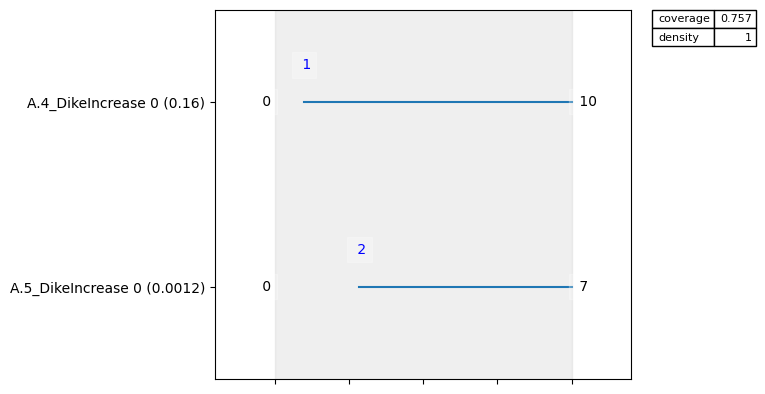

In [133]:
# inspect box limits for the selected point
box_X_best.inspect(point_X_best, style='graph')
plt.show()

Intepretation
- RfR at dike ring 3 appears to be an important determinant of scenarios with more expected deaths in Overijssel
- Also the implementation of dike heigthing at dike ring 5 seems to be a factor the reduce the number of expected deaths as much as possible

Gelderland Expected Casualties
- Do the same exploration as with the expected deaths in Overijssel

In [141]:
print(df_outcomes['Gelderland Expected Number of Deaths'].quantile(0.75))

0.057720599594137154


In [153]:
# --- A. Define binary success condition
Y_good = df_outcomes["Gelderland Expected Number of Deaths"] < df_outcomes["Gelderland Expected Number of Deaths"].quantile(0.75)

# Define binary fail condition
Y_bad = df_outcomes["Gelderland Expected Number of Deaths"] > df_outcomes["Gelderland Expected Number of Deaths"].quantile(0.75)

Y_best = df_outcomes['Gelderland Expected Number of Deaths'] < 0.02

In [170]:
# --- B_1. Fit PRIM algorithm for the good condition
prim_alg_Y_good = prim.Prim(df_experiments, Y_good, threshold=0.8)
box_Y_good = prim_alg_Y_good.find_box()


c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


<Figure size 600x400 with 0 Axes>

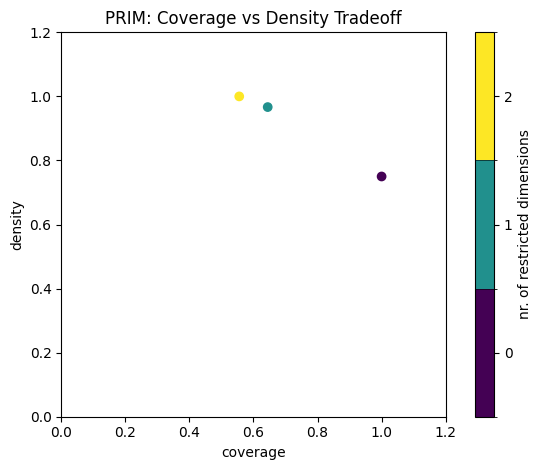

In [171]:
# --- C_1. Plot tradeoff (coverage vs density)
plt.figure(figsize=(6, 4))
box_Y_good.show_tradeoff()
plt.title("PRIM: Coverage vs Density Tradeoff")
plt.tight_layout()
plt.show()

In [174]:
# inspect points 

point_Y_good = 2
box_Y_good.inspect(point_Y_good)

coverage     0.555556
density      1.000000
id           2.000000
k           25.000000
mass         0.416667
mean         1.000000
n           25.000000
res_dim      2.000000
Name: 2, dtype: float64

                         box 2                                
                           min         max  qp value  qp value
A.1_DikeIncrease 2    0.000000    5.000000       NaN  0.428468
A.1_Bmax            185.336012  226.849897  0.001048       NaN



[None]

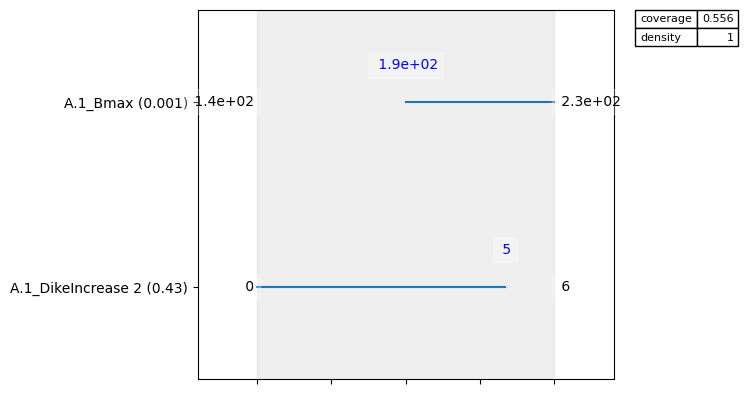

In [175]:
# inspect box limits for the selected point
box_Y_good.inspect(point_Y_good, style='graph')
plt.show()

In [65]:
# --- B_2. Fit PRIM algorithm for the fail condition
prim_alg_Y_bad = prim.Prim(experiments, Y_bad, threshold=0.8)
box_Y_bad = prim_alg_Y_bad.find_box()


c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible

<Figure size 600x400 with 0 Axes>

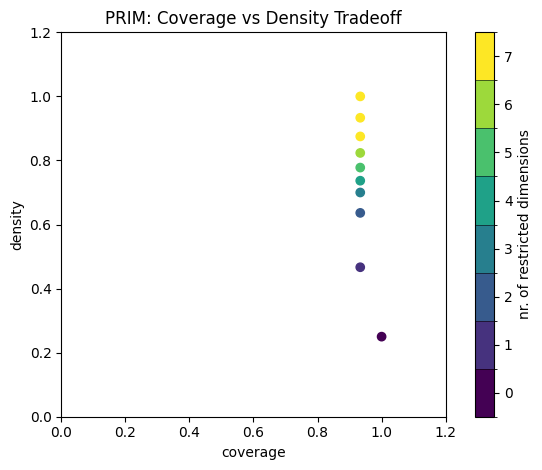

In [66]:
# --- C_2. Plot tradeoff (coverage vs density)
plt.figure(figsize=(6, 4))
box_Y_bad.show_tradeoff()
plt.title("PRIM: Coverage vs Density Tradeoff")
plt.tight_layout()
plt.show()

In [ ]:
# inspect points 

point_Y_bad = 1
box_Y_bad.inspect(point_Y_bad)

coverage     0.933333
density      0.466667
id           1.000000
k           14.000000
mass         0.500000
mean         0.466667
n           30.000000
res_dim      1.000000
Name: 1, dtype: float64

               box 1                               
                 min         max qp value  qp value
A.1_Bmax  143.822128  185.336012      NaN  0.008179



[None]

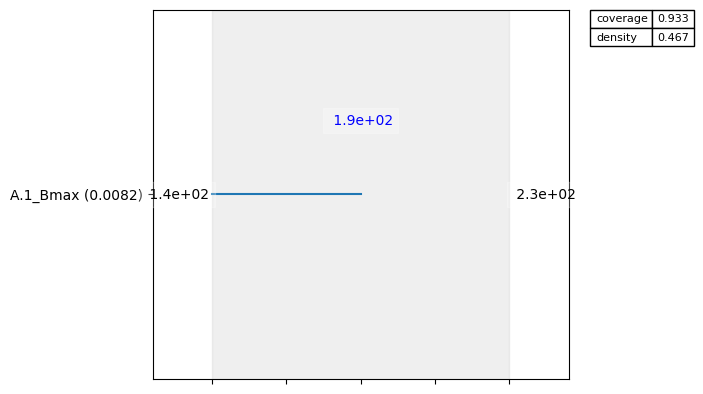

In [68]:
# inspect box limits for the selected point
box_Y_bad.inspect(point_Y_bad, style='graph')
plt.show()

In [176]:
# --- B_1. Fit PRIM algorithm for the best condition (e.g., no deaths)
prim_alg_Y_best = prim.Prim(df_experiments, Y_best, threshold=0.8)
box_Y_best = prim_alg_Y_best.find_box()


<Figure size 600x400 with 0 Axes>

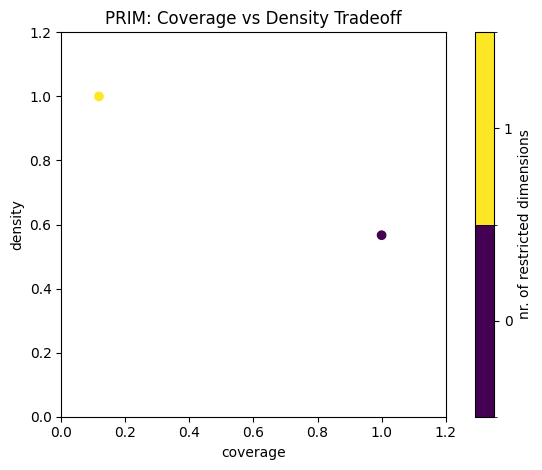

In [177]:
# --- C_2. Plot tradeoff (coverage vs density)
plt.figure(figsize=(6, 4))
box_Y_best.show_tradeoff()
plt.title("PRIM: Coverage vs Density Tradeoff")
plt.tight_layout()
plt.show()

In [ ]:
# inspect points 

point_Y_best = 1
box_Y_best.inspect(point_Y_best)

coverage    0.117647
density     1.000000
id          1.000000
k           4.000000
mass        0.066667
mean        1.000000
n           4.000000
res_dim     1.000000
Name: 1, dtype: float64

        box 1                        
          min  max  qp value qp value
1_RfR 2   1.0  1.0  0.103112      NaN



[None]

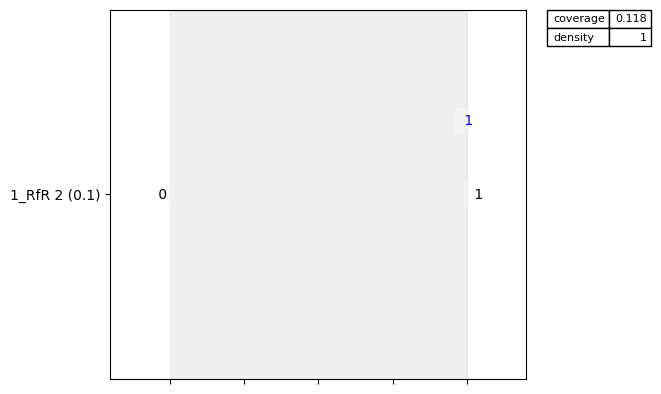

In [179]:
# inspect box limits for the selected point
box_Y_best.inspect(point_Y_best, style='graph')
plt.show()

Overijssel Expected Annual Damage
- Once again explore the scenarios with the best and worst 25% outcomes on this objective

In [71]:
# --- A. Define binary success condition
Z_good = df_outcomes["Overijssel Expected Annual Damage"] < df_outcomes["Overijssel Expected Annual Damage"].quantile(0.75)

# Define binary fail condition
Z_bad = df_outcomes["Overijssel Expected Annual Damage"] > df_outcomes["Overijssel Expected Annual Damage"].quantile(0.75)




In [180]:
# --- B_1. Fit PRIM algorithm for the good condition
prim_alg_Z_good = prim.Prim(df_experiments, Z_good, threshold=0.8)
box_Z_good = prim_alg_Z_good.find_box()


<Figure size 600x400 with 0 Axes>

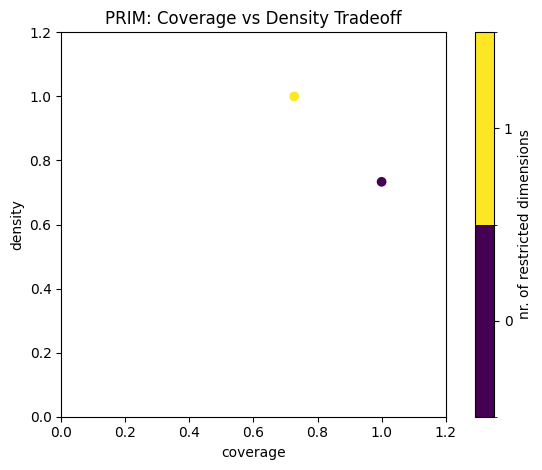

In [181]:
# --- C_1. Plot tradeoff (coverage vs density)
plt.figure(figsize=(6, 4))
box_Z_good.show_tradeoff()
plt.title("PRIM: Coverage vs Density Tradeoff")
plt.tight_layout()
plt.show()

In [ ]:
# inspect points

point_Z_good = 1
box_Z_good.inspect(point_Z_good)

coverage     0.727273
density      1.000000
id           1.000000
k           32.000000
mass         0.533333
mean         1.000000
n           32.000000
res_dim      1.000000
Name: 1, dtype: float64

                   box 1                        
                     min  max  qp value qp value
A.5_DikeIncrease 0   2.0  7.0  0.000049      NaN



[None]

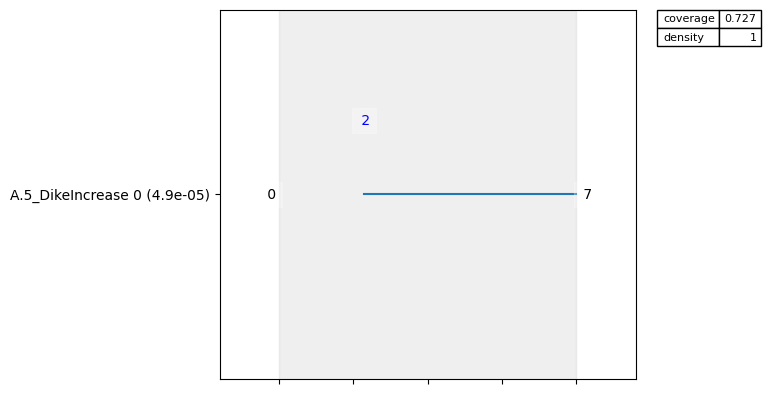

In [183]:
# inspect box limits for the selected point
box_Z_good.inspect(point_Z_good, style='graph')
plt.show()

In [76]:
# --- B_2. Fit PRIM algorithm for the fail condition
prim_alg_Z_bad = prim.Prim(experiments, Z_bad, threshold=0.8)
box_Z_bad = prim_alg_Z_bad.find_box()


<Figure size 600x400 with 0 Axes>

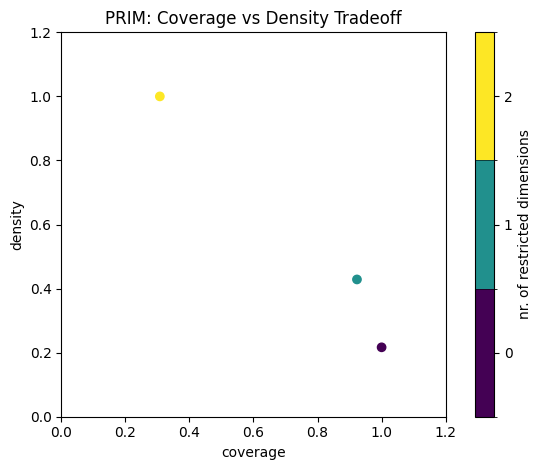

In [77]:
# --- C_2. Plot tradeoff (coverage vs density)
plt.figure(figsize=(6, 4))
box_Z_bad.show_tradeoff()
plt.title("PRIM: Coverage vs Density Tradeoff")
plt.tight_layout()
plt.show()

In [ ]:
# inspect points 

point_Z_bad = 2
box_Z_bad.inspect(point_Z_bad)

coverage    0.307692
density     1.000000
id          2.000000
k           4.000000
mass        0.066667
mean        1.000000
n           4.000000
res_dim     2.000000
Name: 2, dtype: float64

        box 2                         
          min  max  qp value  qp value
3_RfR 2   0.0  0.0       NaN  0.003906
2_RfR 1   1.0  1.0  0.033736       NaN



[None]

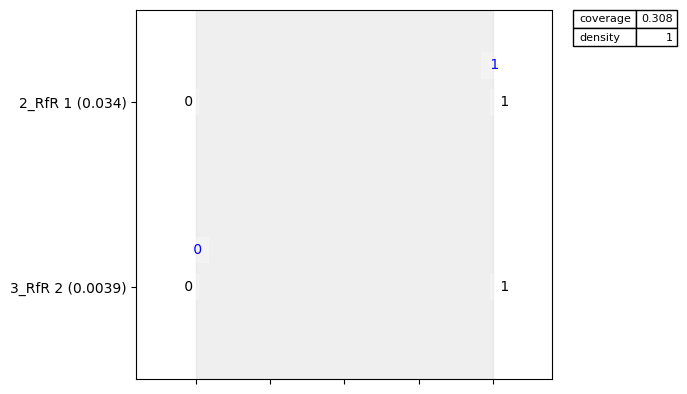

In [81]:
# inspect box limits for the selected point
box_Z_bad.inspect(point_Z_bad, style='graph')
plt.show()

Interpretation
- Just as with expected casualties in Overijssel, a lacking implementation of RfR project 3 seems a driver of high annual damage. 
- The implementation of RfR project 2 appears to be a possible driver of high damage.
- Furthermore, the a dikehight increase at dike ring 5 still appears the a driver of low damage 